In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
import folium
from folium.features import GeoJsonTooltip
from folium.plugins import HeatMap, MarkerCluster
import matplotlib.colors as mcolors
import ace_tools_open as tools

## Singly Constrained Gravity Model with Travel Time

In [2]:
# Load Production and Attraction data
production_attraction = pd.read_csv('prodution_attraction.csv')
production_attraction

,trct,trctname,CNS16,lat,long,tract_number,tract_name,Total Medical Visit
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211,21239050300,"Woodford County, Tract 050300",126.373998


## Load data (Kentucky Travel Time Data)

In [3]:
# Load data (Kentucky Travel Time_Distance Data)
ky_travel_time = pd.read_csv('KY_travel_time_distance.csv')
ky_travel_time

,geoid_origin,origin_x,origin_y,geoid_dest,dest_x,dest_y,travel_distance,travel_time
0,2.123793e+10,-83.588704,37.738887,2.123793e+10,-83.588704,37.738887,0.000000,0.000000
1,2.123793e+10,-83.588704,37.738887,2.103193e+10,-86.731982,37.225166,212.131433,254.830000
2,2.123793e+10,-83.588704,37.738887,2.103193e+10,-86.723313,37.087762,218.796836,262.365000
3,2.123793e+10,-83.588704,37.738887,2.103193e+10,-86.517884,37.236586,206.800490,245.881667
4,2.123793e+10,-83.588704,37.738887,2.103193e+10,-86.848686,37.157033,221.002026,269.431667
...,...,...,...,...,...,...,...,...
1243219,2.119593e+10,-82.380711,37.517216,2.119593e+10,-82.486145,37.621373,23.598183,51.371667
1243220,2.119593e+10,-82.380711,37.517216,2.119593e+10,-82.470858,37.313760,38.993935,55.928333
1243221,2.119593e+10,-82.380711,37.517216,2.119593e+10,-82.562128,37.548172,20.724521,32.423333
1243222,2.119593e+10,-82.380711,37.517216,2.119593e+10,-82.192534,37.562992,22.869686,42.480000


In [4]:
# Load Shapefile
gdf_shp = gpd.read_file('tl_2019_21_tract.shp')
gdf_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131879,707264,+37.7406296,-083.5940784,"POLYGON ((-83.70797 37.71646, -83.70204 37.724..."
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194557718,5686994,+37.2201287,-086.7365307,"POLYGON ((-86.85436 37.25474, -86.85424 37.254..."
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082205,+37.0872907,-086.7250544,"POLYGON ((-86.84134 37.05531, -86.84132 37.055..."
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312270,2862420,+37.2416585,-086.5195770,"POLYGON ((-86.66818 37.22558, -86.66821 37.226..."
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592384,2662267,+37.1576813,-086.8500520,"POLYGON ((-86.94494 37.07296, -86.94488 37.073..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,195,931000,21195931000,9310,Census Tract 9310,G5020,S,70345477,0,+37.3137554,-082.4708692,"POLYGON ((-82.53754 37.26208, -82.53734 37.262..."
1111,21,195,930200,21195930200,9302,Census Tract 9302,G5020,S,129254353,5345,+37.5531372,-082.5485313,"POLYGON ((-82.62441 37.52102, -82.62135 37.526..."
1112,21,195,931600,21195931600,9316,Census Tract 9316,G5020,S,68228358,0,+37.5629802,-082.1925470,"POLYGON ((-82.24536 37.52614, -82.24473 37.527..."
1113,21,195,930400,21195930400,9304,Census Tract 9304,G5020,S,48576134,0,+37.4616900,-082.4810037,"POLYGON ((-82.53365 37.4708, -82.53364 37.4708..."


In [5]:
# Save file as a csv
save_file = gdf_shp.to_csv('shape_file.csv', index=False)

## Prepare KY Travel time for Gravity Model

In [6]:
# Strip spaces from column names to avoid hidden issues
ky_travel_time.columns = ky_travel_time.columns.str.strip()

In [7]:
# Convert geoid_origin and geoid_dest to whole numbers (integers)
ky_travel_time["geoid_origin"] = ky_travel_time["geoid_origin"].astype("int64")
ky_travel_time["geoid_dest"] = ky_travel_time["geoid_dest"].astype("int64")

In [8]:
ky_travel_time

,geoid_origin,origin_x,origin_y,geoid_dest,dest_x,dest_y,travel_distance,travel_time
0,21237930200,-83.588704,37.738887,21237930200,-83.588704,37.738887,0.000000,0.000000
1,21237930200,-83.588704,37.738887,21031930300,-86.731982,37.225166,212.131433,254.830000
2,21237930200,-83.588704,37.738887,21031930400,-86.723313,37.087762,218.796836,262.365000
3,21237930200,-83.588704,37.738887,21031930200,-86.517884,37.236586,206.800490,245.881667
4,21237930200,-83.588704,37.738887,21031930500,-86.848686,37.157033,221.002026,269.431667
...,...,...,...,...,...,...,...,...
1243219,21195931200,-82.380711,37.517216,21195930100,-82.486145,37.621373,23.598183,51.371667
1243220,21195931200,-82.380711,37.517216,21195931000,-82.470858,37.313760,38.993935,55.928333
1243221,21195931200,-82.380711,37.517216,21195930200,-82.562128,37.548172,20.724521,32.423333
1243222,21195931200,-82.380711,37.517216,21195931600,-82.192534,37.562992,22.869686,42.480000


## Convert KY Travel Time to a Square Time Matrix

In [9]:
# Convert `tract_travel_time` to a Square Cost Matrix
time_matrix = ky_travel_time.pivot(index="geoid_origin", columns="geoid_dest", values="travel_time")

# Convert index and columns to string for consistency
time_matrix.index = time_matrix.index.astype(str)
time_matrix.columns = time_matrix.columns.astype(str)

In [10]:
# Print Matrix
time_matrix

geoid_dest,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930100,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400
geoid_origin,,,,,,,,,,,,,,,,,,,,,
21001970100,0.000000,32.320000,34.100000,40.006667,29.610000,48.906667,51.700000,107.393333,111.548333,99.968333,...,201.500000,182.066667,109.876667,109.881667,105.405000,113.030000,106.288333,114.531667,111.031667,120.795000
21001970200,32.296667,0.000000,31.161667,17.568333,11.961667,26.468333,29.261667,84.955000,89.110000,77.530000,...,199.025000,178.626667,101.880000,101.885000,97.408333,105.033333,98.291667,110.030000,103.035000,112.798333
21001970300,33.923333,31.198333,0.000000,33.261667,23.915000,42.305000,43.563333,100.150000,104.305000,92.725000,...,197.995000,177.596667,122.076667,122.081667,117.605000,125.230000,118.488333,126.731667,123.231667,132.995000
21001970401,39.875000,17.563333,33.256667,0.000000,15.366667,20.790000,27.705000,78.721667,82.876667,71.296667,...,196.918333,176.520000,117.223333,117.228333,112.751667,120.376667,113.635000,125.373333,118.378333,128.141667
21001970402,29.530000,12.035000,23.931667,15.418333,0.000000,24.318333,26.370000,82.546667,86.701667,75.121667,...,196.133333,175.735000,111.695000,111.700000,107.223333,114.848333,108.106667,119.845000,112.850000,122.613333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050106,113.968333,105.213333,126.050000,120.656667,115.050000,129.556667,132.350000,171.908333,185.166667,175.505000,...,113.740000,94.306667,18.135000,15.061667,14.645000,0.000000,9.380000,27.686667,16.211667,25.975000
21239050107,105.846667,97.091667,117.928333,112.535000,106.928333,121.435000,124.228333,163.786667,177.045000,167.383333,...,114.813333,95.380000,10.995000,11.000000,6.523333,15.260000,0.000000,19.565000,12.150000,21.913333
21239050200,115.118333,110.381667,127.200000,125.825000,120.218333,134.725000,137.518333,177.076667,190.335000,180.673333,...,127.050000,107.616667,22.770000,23.566667,19.090000,27.496667,20.755000,0.000000,24.716667,34.480000


## Handle zeros in the travel time matrix 

In [11]:
# Function to replace zeros
def replace_zeros_with_half_min(df):
    for index, row in df.iterrows():
        min_value = row[row > 0].min()  # Get minimum value excluding zeros
        if not np.isnan(min_value):  # Ensure there is a valid minimum
            df.loc[index] = row.replace(0, min_value / 2)
    return df

# Apply the transformation
time_matrix = replace_zeros_with_half_min(time_matrix)
time_matrix

geoid_dest,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930100,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400
geoid_origin,,,,,,,,,,,,,,,,,,,,,
21001970100,14.805000,32.320000,34.100000,40.006667,29.610000,48.906667,51.700000,107.393333,111.548333,99.968333,...,201.500000,182.066667,109.876667,109.881667,105.405000,113.030000,106.288333,114.531667,111.031667,120.795000
21001970200,32.296667,5.980833,31.161667,17.568333,11.961667,26.468333,29.261667,84.955000,89.110000,77.530000,...,199.025000,178.626667,101.880000,101.885000,97.408333,105.033333,98.291667,110.030000,103.035000,112.798333
21001970300,33.923333,31.198333,11.957500,33.261667,23.915000,42.305000,43.563333,100.150000,104.305000,92.725000,...,197.995000,177.596667,122.076667,122.081667,117.605000,125.230000,118.488333,126.731667,123.231667,132.995000
21001970401,39.875000,17.563333,33.256667,7.683333,15.366667,20.790000,27.705000,78.721667,82.876667,71.296667,...,196.918333,176.520000,117.223333,117.228333,112.751667,120.376667,113.635000,125.373333,118.378333,128.141667
21001970402,29.530000,12.035000,23.931667,15.418333,6.017500,24.318333,26.370000,82.546667,86.701667,75.121667,...,196.133333,175.735000,111.695000,111.700000,107.223333,114.848333,108.106667,119.845000,112.850000,122.613333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050106,113.968333,105.213333,126.050000,120.656667,115.050000,129.556667,132.350000,171.908333,185.166667,175.505000,...,113.740000,94.306667,18.135000,15.061667,14.645000,4.690000,9.380000,27.686667,16.211667,25.975000
21239050107,105.846667,97.091667,117.928333,112.535000,106.928333,121.435000,124.228333,163.786667,177.045000,167.383333,...,114.813333,95.380000,10.995000,11.000000,6.523333,15.260000,3.261667,19.565000,12.150000,21.913333
21239050200,115.118333,110.381667,127.200000,125.825000,120.218333,134.725000,137.518333,177.076667,190.335000,180.673333,...,127.050000,107.616667,22.770000,23.566667,19.090000,27.496667,20.755000,9.545000,24.716667,34.480000


## Define Common Zones for the Model

In [12]:
# Align Cost Matrix with Production Attraction Data
production_attraction["tract_number"] = production_attraction["tract_number"].astype(str).str.strip()

# Set zones
common_zones = production_attraction["tract_number"]

## Convert to numpy arrays for Gravity Model

In [13]:
# Convert to numpy arrays for Gravity Model
O = production_attraction["Total Medical Visit"].values
D = production_attraction["CNS16"].values
traveltime_array = time_matrix.values

## Apply Power Function Deterrence

In [14]:
# Apply Power Function Deterrence
def deterrence_function(travel_time, beta):
    """
    Computes the deterrence function using a power function.

    Parameters:
    - cost_matrix (array): Travel Time matrix.
    - beta (float): Impedance parameter.

    Returns:
    - deterrence_matrix (array): Transformed deterrence matrix.
    """
    #travel_time = np.where(travel_time == 0, 1e-9, travel_time)  # Prevent division by zero
    travel_time_adjusted = np.where(travel_time < 10, travel_time*3.05, travel_time)  
    impedance = np.power(travel_time_adjusted, beta)
    return impedance

## Apply deterrence function with β = 3.5

In [15]:
# Apply deterrence function with β = 3.5
beta = -3.5
deterrence_matrix = deterrence_function(traveltime_array, beta)

In [16]:
traveltime_array

array([[ 14.805     ,  32.32      ,  34.1       , ..., 114.53166667,
        111.03166667, 120.795     ],
       [ 32.29666667,   5.98083333,  31.16166667, ..., 110.03      ,
        103.035     , 112.79833333],
       [ 33.92333333,  31.19833333,  11.9575    , ..., 126.73166667,
        123.23166667, 132.995     ],
       ...,
       [115.11833333, 110.38166667, 127.2       , ...,   9.545     ,
         24.71666667,  34.48      ],
       [111.075     , 102.32      , 123.15666667, ...,  24.00666667,
          2.90833333,  16.73      ],
       [121.51      , 112.755     , 133.59166667, ...,  34.44166667,
         17.22833333,   7.4975    ]])

In [17]:
deterrence_matrix

array([[8.00885736e-05, 5.21015049e-06, 4.31876600e-06, ...,
        6.21957154e-08, 6.93323616e-08, 5.16212654e-08],
       [5.22333699e-06, 3.85731061e-05, 5.92008072e-06, ...,
        7.15667186e-08, 9.00644261e-08, 6.56055545e-08],
       [4.39799955e-06, 5.89576441e-06, 1.69144794e-04, ...,
        4.36417330e-08, 4.81362077e-08, 3.68617884e-08],
       ...,
       [6.10933969e-08, 7.07718722e-08, 4.30819260e-08, ...,
        7.51164055e-06, 1.33209546e-05, 4.15446017e-06],
       [6.92377384e-08, 9.22864924e-08, 4.82388848e-08, ...,
        1.47515781e-05, 4.81056325e-04, 5.22112639e-05],
       [5.05659216e-08, 6.56938429e-08, 3.62887670e-08, ...,
        4.17066630e-06, 4.71138472e-05, 1.74881110e-05]])

## Build Gravity Model

In [18]:
# Singly Constrained Gravity Model (Production-Constrained)
def gravity_model_single_constrained(O, D, deterrence_matrix, error_threshold=0.01, improvement_threshold=1e-4, max_iterations=100):
    """
    Implements a singly constrained Gravity Model for trip distribution (Production-Constrained).
    
    Parameters:
    - O (array): Origin trip productions.
    - D (array): Destination trip attractions.
    - deterrence_matrix (array): Deterrence function values.
    - error_threshold (float): Convergence criterion for total error.
    - improvement_threshold (float): Minimum improvement required to continue.
    - max_iterations (int): Maximum iterations allowed.

    Returns:
    - Final OD matrix (DataFrame).
    """

    # Normalize O and D to ensure balance on productions
    sum_O = np.sum(O)
    
    if sum_O == 0:
        raise ValueError("Origin (O) matrix must have a non-zero sum.")

    n = len(O)  # Number of zones

    # Initialize balancing factors Ai (for O) and Tij matrix
    Ai = np.ones(n)  # Ai balancing factor, initially set to 1
    Tij = np.zeros((n, n))  # Initialize trips matrix

    previous_error = np.inf  # Initialize previous error
    iteration_count = 0  # Count iterations

    while iteration_count < max_iterations:
        iteration_count += 1  

        # Update Ai balancing factors using vectorized operations
        denominator_Ai = np.sum(D * deterrence_matrix, axis=1)
        Ai = np.where(denominator_Ai > 1e-9, 1 / denominator_Ai, 1e-9)

        # Compute new Tij matrix
        Tij = np.outer(Ai * O, D) * deterrence_matrix

        # Compute row (production) error
        error = np.sum(np.abs(O - np.sum(Tij, axis=1))) / sum_O

        # Compute improvement
        error_change = abs(previous_error - error)

        # Check stopping conditions
        if error < error_threshold:
            stop_reason = "Error threshold met"
            break
        elif error_change < improvement_threshold:
            stop_reason = "Slow improvement"
            break

        previous_error = error  

    else:  # If loop completes without breaking
        stop_reason = "Maximum iterations reached"

    # Format results into a DataFrame
    final_matrix = pd.DataFrame(
        Tij, 
        columns=common_zones, 
        index=common_zones
    )

    # Add total row and column
    final_matrix["Production"] = final_matrix.sum(axis=1)  # Ensures rows sum to O
    final_matrix.loc["Attraction"] = final_matrix.sum(axis=0)  # Optional: Sum of columns

    # Print results
    print(f"Number of Iterations: {iteration_count}")
    print(f"Stopping Condition: {stop_reason}")
    print(f"Final Error: {error * 100:.3f}%")

    return final_matrix


In [19]:
# Run the Gravity Model
final_singly_matrix = gravity_model_single_constrained(O, D, deterrence_matrix)

Number of Iterations: 100
Stopping Condition: Maximum iterations reached
Final Error: nan%


In [20]:
production_attraction

,trct,trctname,CNS16,lat,long,tract_number,tract_name,Total Medical Visit
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211,21239050300,"Woodford County, Tract 050300",126.373998


In [21]:
final_singly_matrix

tract_number,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400,Production
tract_number,,,,,,,,,,,,,,,,,,,,,
21001970100,0.0,0.660443,0.078207,3.174550,5.640341,0.008854,0.003645,0.000282,0.000741,0.131252,...,0.011830,0.011200,0.073700,0.001205,0.023827,0.015798,0.005857,0.001256,0.011031,116.400718
21001970200,0.0,1.350657,0.029614,15.626574,37.182975,0.020974,0.007382,0.000177,0.000449,0.088259,...,0.003494,0.004030,0.026521,0.000439,0.008509,0.005738,0.001862,0.000451,0.003872,130.701292
21001970300,0.0,1.275923,5.229315,10.342856,20.337263,0.025112,0.011332,0.000615,0.001601,0.291565,...,0.022033,0.013227,0.087041,0.001402,0.028416,0.018439,0.007016,0.001488,0.013448,216.206251
21001970401,0.0,7.414981,0.113386,27.410776,74.397804,0.234804,0.042975,0.001111,0.002785,0.569027,...,0.017509,0.011860,0.078044,0.001264,0.025386,0.016606,0.005668,0.001333,0.011915,301.566243
21001970402,0.0,17.037318,0.219512,72.609237,24.451833,0.083015,0.031261,0.000576,0.001455,0.290018,...,0.010884,0.008595,0.056558,0.000922,0.018314,0.012101,0.004062,0.000964,0.008509,245.354618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050107,0.0,0.001288,0.000093,0.007790,0.005773,0.000034,0.000016,0.000006,0.000013,0.001979,...,0.010414,3.236810,21.268857,0.037775,2.413863,5.769497,0.260391,0.265329,0.397379,248.863732
21239050200,0.0,0.003866,0.000336,0.024797,0.018025,0.000110,0.000051,0.000021,0.000049,0.007127,...,0.032112,1.191394,6.951853,0.205398,1.446102,2.069293,0.304836,0.103959,0.382582,282.790542
21239050300,0.0,0.000489,0.000036,0.003031,0.002228,0.000013,0.000006,0.000002,0.000006,0.000811,...,0.004699,1.253994,1.820908,0.004178,1.030416,0.135959,0.058039,0.363979,0.466151,126.373998


In [22]:
# Display Results
tools.display_dataframe_to_user(name="Final OD Matrix", dataframe=final_singly_matrix)

Final OD Matrix


## Extract the Attracted Trips from the Model

In [23]:
# Get the last row
gravity_attraction = final_singly_matrix.iloc[[-1]]  # Select last row while keeping it as a DataFrame
gravity_attraction

tract_number,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400,Production
tract_number,,,,,,,,,,,,,,,,,,,,,
Attraction,0.0,48.913283,6.987153,290.71423,261.327886,2.951723,0.776227,0.753079,3.613493,612.390154,...,316.781631,32.66269,243.162549,2.877633,48.469085,49.514878,6.904812,5.007931,29.663258,274396.131821


In [24]:
# Remove the 'Production' column
gravity_attraction = gravity_attraction.drop(columns=["Production"])

# Transpose the dataset to swap rows and columns
gravity_attraction = gravity_attraction.T  # Transpose

# Rename columns to match the required format
gravity_attraction.reset_index(inplace=True)  # Convert index to column
gravity_attraction.columns = ["GEOID", "Attracted Trips"]  # Rename columns

gravity_attraction

,GEOID,Attracted Trips
0,21001970100,0.000000
1,21001970200,48.913283
2,21001970300,6.987153
3,21001970401,290.714230
4,21001970402,261.327886
...,...,...
1110,21239050106,48.469085
1111,21239050107,49.514878
1112,21239050200,6.904812
1113,21239050300,5.007931


## Merge Tract name to Attraction

In [25]:
gravity_attraction

,GEOID,Attracted Trips
0,21001970100,0.000000
1,21001970200,48.913283
2,21001970300,6.987153
3,21001970401,290.714230
4,21001970402,261.327886
...,...,...
1110,21239050106,48.469085
1111,21239050107,49.514878
1112,21239050200,6.904812
1113,21239050300,5.007931


In [26]:
production_attraction

,trct,trctname,CNS16,lat,long,tract_number,tract_name,Total Medical Visit
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211,21239050300,"Woodford County, Tract 050300",126.373998


In [27]:
# Rename trct to GEOID

production_attraction.rename(columns={'trct': 'GEOID'}, inplace=True)
production_attraction

,GEOID,trctname,CNS16,lat,long,tract_number,tract_name,Total Medical Visit
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997,21001970100,"Adair County, Tract 970100",116.400718
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815,21001970200,"Adair County, Tract 970200",130.701292
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588,21001970300,"Adair County, Tract 970300",216.206251
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457,21001970401,"Adair County, Tract 970401",301.566243
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557,21001970402,"Adair County, Tract 970402",245.354618
...,...,...,...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406,21239050106,"Woodford County, Tract 050106",245.115946
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097,21239050107,"Woodford County, Tract 050107",248.863732
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228,21239050200,"Woodford County, Tract 050200",282.790542
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211,21239050300,"Woodford County, Tract 050300",126.373998


In [28]:
# Convert GEOID to string in both datasets
production_attraction["GEOID"] = production_attraction["GEOID"].astype(str)
#gravity_attraction["GEOID"] = gravity_attraction["GEOID"].astype(str)

In [29]:
# Merge the shapefile data with the medical visit data
merged_tract_name = production_attraction.merge(gravity_attraction, on="GEOID", how="left")
merged_tract_name

,GEOID,trctname,CNS16,lat,long,tract_number,tract_name,Total Medical Visit,Attracted Trips
0,21001970100,"9701 (Adair, KY)",0,37.235091,-85.158997,21001970100,"Adair County, Tract 970100",116.400718,0.000000
1,21001970200,"9702 (Adair, KY)",35,37.172349,-85.337815,21001970200,"Adair County, Tract 970200",130.701292,48.913283
2,21001970300,"9703 (Adair, KY)",5,37.128164,-85.156588,21001970300,"Adair County, Tract 970300",216.206251,6.987153
3,21001970401,"9704.01 (Adair, KY)",355,37.052371,-85.328457,21001970401,"Adair County, Tract 970401",301.566243,290.714230
4,21001970402,"9704.02 (Adair, KY)",220,37.122300,-85.276557,21001970402,"Adair County, Tract 970402",245.354618,261.327886
...,...,...,...,...,...,...,...,...,...
1110,21239050106,"501.06 (Woodford, KY)",101,38.021165,-84.687406,21239050106,"Woodford County, Tract 050106",245.115946,48.469085
1111,21239050107,"501.07 (Woodford, KY)",54,38.044747,-84.687097,21239050107,"Woodford County, Tract 050107",248.863732,49.514878
1112,21239050200,"502 (Woodford, KY)",26,37.960814,-84.732228,21239050200,"Woodford County, Tract 050200",282.790542,6.904812
1113,21239050300,"503 (Woodford, KY)",5,38.098915,-84.773211,21239050300,"Woodford County, Tract 050300",126.373998,5.007931


In [30]:
select_attraction = merged_tract_name[['trctname', 'Attracted Trips']]

select_attraction

,trctname,Attracted Trips
0,"9701 (Adair, KY)",0.000000
1,"9702 (Adair, KY)",48.913283
2,"9703 (Adair, KY)",6.987153
3,"9704.01 (Adair, KY)",290.714230
4,"9704.02 (Adair, KY)",261.327886
...,...,...
1110,"501.06 (Woodford, KY)",48.469085
1111,"501.07 (Woodford, KY)",49.514878
1112,"502 (Woodford, KY)",6.904812
1113,"503 (Woodford, KY)",5.007931


In [31]:
# Save file as a csv
save_file = select_attraction.to_csv('select_attraction.csv', index=False)

In [32]:
# Convert GEOID to string in both datasets
gdf_shp["GEOID"] = gdf_shp["GEOID"].astype(str)
gravity_attraction["GEOID"] = gravity_attraction["GEOID"].astype(str)

## Merge the Attracted Trips from the Model to a shapefile for visualization

In [33]:
# Merge the shapefile data with the medical visit data
merged_attraction = gdf_shp.merge(gravity_attraction, on="GEOID", how="left")
merged_attraction

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry,Attracted Trips
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131879,707264,+37.7406296,-083.5940784,"POLYGON ((-83.70797 37.71646, -83.70204 37.724...",316.781631
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194557718,5686994,+37.2201287,-086.7365307,"POLYGON ((-86.85436 37.25474, -86.85424 37.254...",291.639698
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082205,+37.0872907,-086.7250544,"POLYGON ((-86.84134 37.05531, -86.84132 37.055...",3.155786
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312270,2862420,+37.2416585,-086.5195770,"POLYGON ((-86.66818 37.22558, -86.66821 37.226...",0.000000
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592384,2662267,+37.1576813,-086.8500520,"POLYGON ((-86.94494 37.07296, -86.94488 37.073...",2.148641
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,195,931000,21195931000,9310,Census Tract 9310,G5020,S,70345477,0,+37.3137554,-082.4708692,"POLYGON ((-82.53754 37.26208, -82.53734 37.262...",7.498308
1111,21,195,930200,21195930200,9302,Census Tract 9302,G5020,S,129254353,5345,+37.5531372,-082.5485313,"POLYGON ((-82.62441 37.52102, -82.62135 37.526...",374.329647
1112,21,195,931600,21195931600,9316,Census Tract 9316,G5020,S,68228358,0,+37.5629802,-082.1925470,"POLYGON ((-82.24536 37.52614, -82.24473 37.527...",18.835484
1113,21,195,930400,21195930400,9304,Census Tract 9304,G5020,S,48576134,0,+37.4616900,-082.4810037,"POLYGON ((-82.53365 37.4708, -82.53364 37.4708...",2043.899543


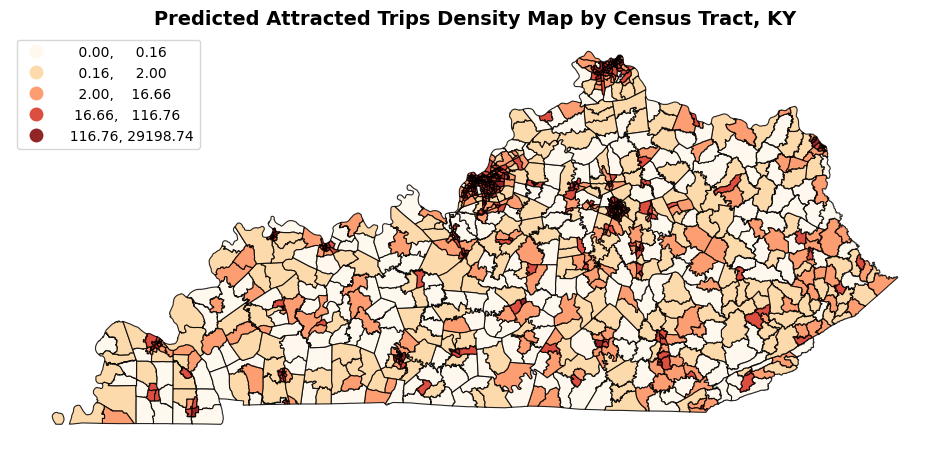

In [35]:
# Convert ALAND (land area) from square meters to square miles
merged_attraction["Land_Area_sq_miles"] = merged_attraction["ALAND"] / (1609.34 ** 2)

# Calculate CNS16 density per square mile
merged_attraction["Attraction_Density_per_sq_mile"] = merged_attraction["Attracted Trips"] / merged_attraction["Land_Area_sq_miles"]

# Define the color scheme and classification method
color_scheme = "OrRd"  # Try: "magma", "cividis", "coolwarm", "OrRd", "YlGnBu"

# Create a choropleth density map with automatic quantile classification
fig, ax = plt.subplots(figsize=(12, 12))
merged_attraction.plot(
    column="Attraction_Density_per_sq_mile",
    cmap=color_scheme,
    legend=True,
    linewidth=0.8,
    edgecolor="black",
    alpha=0.85,
    ax=ax,
    scheme="quantiles",
    k=5,
    legend_kwds={"loc": "upper left"}  
)

# Set title and remove axis labels for a clean visualization
ax.set_title("Predicted Attracted Trips Density Map by Census Tract, KY", fontsize=14, fontweight="bold")
ax.axis("off")  # Hide axes for a cleaner map

# Show the map
plt.show()


## Create the Time bins

In [30]:
# Drop the last column (Production) and the last row (Attraction) from the OD Matrix
Trip_Matrix = final_singly_matrix.iloc[:-1, :-1]

Trip_Matrix

tract_number,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930100,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400
tract_number,,,,,,,,,,,,,,,,,,,,,
21001970100,0.0,0.660443,0.078207,3.174550,5.640341,0.008854,0.003645,0.000282,0.000741,0.131252,...,0.001029,0.011830,0.011200,0.073700,0.001205,0.023827,0.015798,0.005857,0.001256,0.011031
21001970200,0.0,1.350657,0.029614,15.626574,37.182975,0.020974,0.007382,0.000177,0.000449,0.088259,...,0.000297,0.003494,0.004030,0.026521,0.000439,0.008509,0.005738,0.001862,0.000451,0.003872
21001970300,0.0,1.275923,5.229315,10.342856,20.337263,0.025112,0.011332,0.000615,0.001601,0.291565,...,0.001868,0.022033,0.013227,0.087041,0.001402,0.028416,0.018439,0.007016,0.001488,0.013448
21001970401,0.0,7.414981,0.113386,27.410776,74.397804,0.234804,0.042975,0.001111,0.002785,0.569027,...,0.001481,0.017509,0.011860,0.078044,0.001264,0.025386,0.016606,0.005668,0.001333,0.011915
21001970402,0.0,17.037318,0.219512,72.609237,24.451833,0.083015,0.031261,0.000576,0.001455,0.290018,...,0.000919,0.010884,0.008595,0.056558,0.000922,0.018314,0.012101,0.004062,0.000964,0.008509
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050106,0.0,0.000959,0.000073,0.006025,0.004411,0.000026,0.000012,0.000005,0.000011,0.001655,...,0.000689,0.010695,0.554415,6.988905,0.108975,2.987757,0.141193,0.076244,0.095445,0.216315
21239050107,0.0,0.001288,0.000093,0.007790,0.005773,0.000034,0.000016,0.000006,0.000013,0.001979,...,0.000675,0.010414,3.236810,21.268857,0.037775,2.413863,5.769497,0.260391,0.265329,0.397379
21239050200,0.0,0.003866,0.000336,0.024797,0.018025,0.000110,0.000051,0.000021,0.000049,0.007127,...,0.002228,0.032112,1.191394,6.951853,0.205398,1.446102,2.069293,0.304836,0.103959,0.382582


In [31]:
# Save file as a csv
save_file = Trip_Matrix.to_csv('gravity_OD_matrix.csv', index=True)

In [32]:
time_matrix

geoid_dest,21001970100,21001970200,21001970300,21001970401,21001970402,21001970500,21001970600,21003920100,21003920200,21003920300,...,21237930100,21237930200,21239050103,21239050104,21239050105,21239050106,21239050107,21239050200,21239050300,21239050400
geoid_origin,,,,,,,,,,,,,,,,,,,,,
21001970100,14.805000,32.320000,34.100000,40.006667,29.610000,48.906667,51.700000,107.393333,111.548333,99.968333,...,201.500000,182.066667,109.876667,109.881667,105.405000,113.030000,106.288333,114.531667,111.031667,120.795000
21001970200,32.296667,5.980833,31.161667,17.568333,11.961667,26.468333,29.261667,84.955000,89.110000,77.530000,...,199.025000,178.626667,101.880000,101.885000,97.408333,105.033333,98.291667,110.030000,103.035000,112.798333
21001970300,33.923333,31.198333,11.957500,33.261667,23.915000,42.305000,43.563333,100.150000,104.305000,92.725000,...,197.995000,177.596667,122.076667,122.081667,117.605000,125.230000,118.488333,126.731667,123.231667,132.995000
21001970401,39.875000,17.563333,33.256667,7.683333,15.366667,20.790000,27.705000,78.721667,82.876667,71.296667,...,196.918333,176.520000,117.223333,117.228333,112.751667,120.376667,113.635000,125.373333,118.378333,128.141667
21001970402,29.530000,12.035000,23.931667,15.418333,6.017500,24.318333,26.370000,82.546667,86.701667,75.121667,...,196.133333,175.735000,111.695000,111.700000,107.223333,114.848333,108.106667,119.845000,112.850000,122.613333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21239050106,113.968333,105.213333,126.050000,120.656667,115.050000,129.556667,132.350000,171.908333,185.166667,175.505000,...,113.740000,94.306667,18.135000,15.061667,14.645000,4.690000,9.380000,27.686667,16.211667,25.975000
21239050107,105.846667,97.091667,117.928333,112.535000,106.928333,121.435000,124.228333,163.786667,177.045000,167.383333,...,114.813333,95.380000,10.995000,11.000000,6.523333,15.260000,3.261667,19.565000,12.150000,21.913333
21239050200,115.118333,110.381667,127.200000,125.825000,120.218333,134.725000,137.518333,177.076667,190.335000,180.673333,...,127.050000,107.616667,22.770000,23.566667,19.090000,27.496667,20.755000,9.545000,24.716667,34.480000


## Create Time Bin

In [73]:
# Define time bins 
time_bins = list(range(0, 300, 10))

bin_labels = [f"{time_bins[i]}-{time_bins[i+1]}" for i in range(len(time_bins)-1)]

# Create a DataFrame to store results
trip_sums = {label: 0 for label in bin_labels}

# Process each bin
for i in range(len(time_bins) - 1):
    bin_min, bin_max = time_bins[i], time_bins[i+1]
    
    # Find indices where time values fall in the bin range
    mask = (time_matrix >= bin_min) & (time_matrix < bin_max)
    
    # Extract corresponding trip values
    total_trips = Trip_Matrix[mask].sum().sum()
    
    # Store the result
    trip_sums[bin_labels[i]] = total_trips

# Convert results to a DataFrame
time_df = pd.DataFrame(list(trip_sums.items()), columns=['Time Bin', 'Total Trips'])

time_df


,Time Bin,Total Trips
0,0-10,39841.092274
1,10-20,114446.916047
2,20-30,46802.364443
3,30-40,23733.114711
4,40-50,13558.315460
5,50-60,9413.629536
6,60-70,6292.936877
7,70-80,4369.052757
8,80-90,3271.966124
9,90-100,2613.214309


In [74]:
# Adding Cumulative Sum Column
time_df["Cumulative Total Trips"] = time_df["Total Trips"].cumsum()

# Calculating Total Cumulative Sum
total_cumulative_sum = time_df["Cumulative Total Trips"].iloc[-1] 

# Adding Trip Rate Column
time_df["% of Trip"] = (time_df["Total Trips"] / total_cumulative_sum) * 100

time_df

,Time Bin,Total Trips,Cumulative Total Trips,% of Trip
0,0-10,39841.092274,39841.092274,14.869368
1,10-20,114446.916047,154288.008322,42.713519
2,20-30,46802.364443,201090.372765,17.467432
3,30-40,23733.114711,224823.487476,8.857599
4,40-50,13558.315460,238381.802936,5.060192
5,50-60,9413.629536,247795.432472,3.513325
6,60-70,6292.936877,254088.369349,2.348630
7,70-80,4369.052757,258457.422106,1.630604
8,80-90,3271.966124,261729.388230,1.221153
9,90-100,2613.214309,264342.602539,0.975296


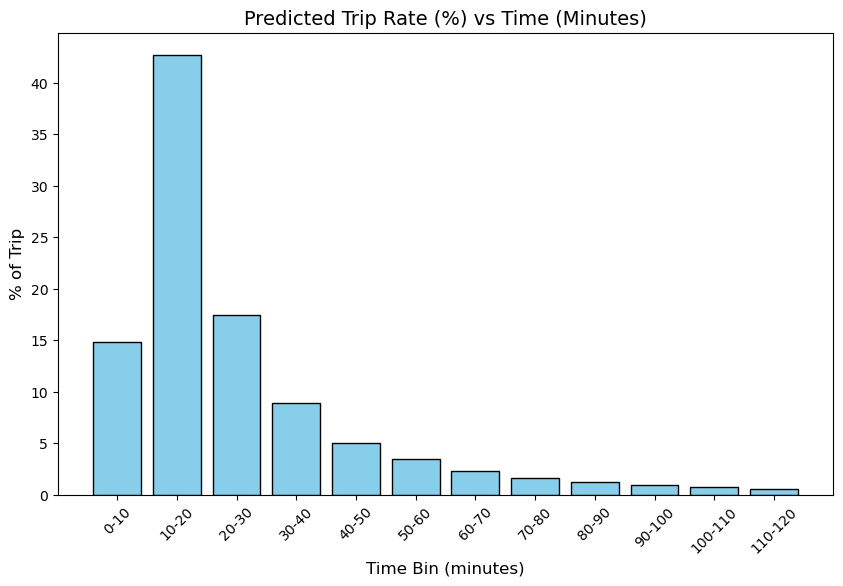

In [76]:
# Plotting the histogram
plt.figure(figsize=(10, 6))
plt.bar(time_df["Time Bin"], time_df["% of Trip"], color='skyblue', edgecolor='black')

# Labels and title
plt.xlabel("Time Bin (minutes)", fontsize=12)
plt.ylabel("% of Trip", fontsize=12)
plt.title("Predicted Trip Rate (%) vs Time (Minutes)", fontsize=14)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability

# Show the plot
plt.show()


## Average Travel time

In [65]:
# Calculate midpoints of each time bin
time_df["Midpoint"] = time_df["Time Bin"].apply(lambda x: np.mean([int(i) for i in x.split('-')]))

# Compute weighted average travel time
average_travel_time = (time_df["Midpoint"] * time_df["Total Trips"]).sum() / time_df["Total Trips"].sum()

print(f"Average Travel Time: {average_travel_time:.2f} minutes")


Average Travel Time: 28.18 minutes


## Compare Observed and Predicted

In [77]:
# Load data (NHTS Data)
nhts_time_bin = pd.read_csv('NHTS_Time_bin.csv')
nhts_time_bin

,Time Bin,Total Medical Visits,Cumulative Total Medical Visits,Visit Rate (%)
0,0-10,2334,2334,14.165200
1,10-20,5919,8253,35.922801
2,20-30,2856,11109,17.333252
3,30-40,2663,13772,16.161923
4,40-50,1056,14828,6.408934
5,50-60,416,15244,2.524731
6,60-70,636,15880,3.859926
7,70-80,227,16107,1.377678
8,80-90,88,16195,0.534078
9,90-100,182,16377,1.104570


In [78]:
time_df

,Time Bin,Total Trips,Cumulative Total Trips,% of Trip
0,0-10,39841.092274,39841.092274,14.869368
1,10-20,114446.916047,154288.008322,42.713519
2,20-30,46802.364443,201090.372765,17.467432
3,30-40,23733.114711,224823.487476,8.857599
4,40-50,13558.315460,238381.802936,5.060192
5,50-60,9413.629536,247795.432472,3.513325
6,60-70,6292.936877,254088.369349,2.348630
7,70-80,4369.052757,258457.422106,1.630604
8,80-90,3271.966124,261729.388230,1.221153
9,90-100,2613.214309,264342.602539,0.975296


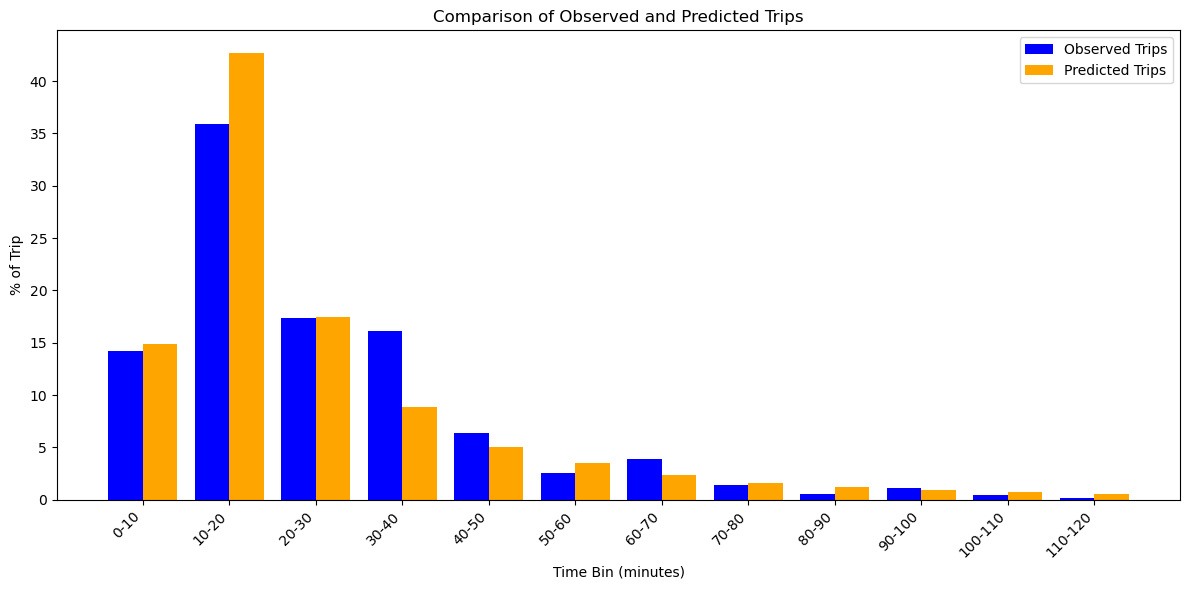

In [80]:
time_bins = ["0-10", "10-20", "20-30", "30-40", "40-50", "50-60", "60-70", "70-80", "80-90", "90-100", "100-110",
            "110-120"]

nhts_time_bin = nhts_time_bin.iloc[:12]  # Select only 20 rows
time_df = time_df.iloc[:12]  # Select only 20 rows

# Bar width
bar_width = 0.4
x = np.arange(len(time_bins))  # X-axis positions

# Increase figure size
plt.figure(figsize=(12, 6))

# Plot histograms (bar plots)
plt.bar(x - bar_width/2, nhts_time_bin['Visit Rate (%)'], width=bar_width, color='blue', label="Observed Trips")
plt.bar(x + bar_width/2, time_df['% of Trip'], width=bar_width, color='orange', label="Predicted Trips")

# Labels and Title
plt.xlabel("Time Bin (minutes)")
plt.ylabel("% of Trip")
plt.title("Comparison of Observed and Predicted Trips")

# X-axis ticks
plt.xticks(x, time_bins, rotation=45, ha="right")  # Rotate labels for better readability

# Adjust layout
plt.tight_layout()

# Legend
plt.legend()

# Show plot
plt.show()


## Desire Line Map (Travel Time)

In [40]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import LineString
import matplotlib.pyplot as plt
from shapely.geometry import LineString
from matplotlib.collections import LineCollection

In [41]:
# Load OD Matrix data
od_matrix = pd.read_csv('gravity_OD_matrix.csv', index_col=0)

# Convert the square matrix into a long format dataframe
od_long = od_matrix.stack().reset_index()
od_long.columns = ["origin_geo_id", "dest_geo_id", "flow_count"]

In [42]:
# Convert dataset to have same data type
od_long['origin_geo_id'] = od_long['origin_geo_id'].astype(str)
od_long['dest_geo_id'] = od_long['dest_geo_id'].astype(str)
gdf_shp['GEOID'] = gdf_shp['GEOID'].astype(str)

In [43]:
od_long

,origin_geo_id,dest_geo_id,flow_count
0,21001970100,21001970100,0.000000
1,21001970100,21001970200,0.660443
2,21001970100,21001970300,0.078207
3,21001970100,21001970401,3.174550
4,21001970100,21001970402,5.640341
...,...,...,...
1243219,21239050400,21239050106,0.438467
1243220,21239050400,21239050107,0.841023
1243221,21239050400,21239050200,0.042113
1243222,21239050400,21239050300,0.091487


In [44]:
# Save file as a csv
save_file = od_long.to_csv('gravity_matrix_long.csv', index=False)

In [45]:
gdf_shp

,STATEFP,COUNTYFP,TRACTCE,GEOID,NAME,NAMELSAD,MTFCC,FUNCSTAT,ALAND,AWATER,INTPTLAT,INTPTLON,geometry
0,21,237,930200,21237930200,9302,Census Tract 9302,G5020,S,248131879,707264,+37.7406296,-083.5940784,"POLYGON ((-83.70797 37.71646, -83.70204 37.724..."
1,21,031,930300,21031930300,9303,Census Tract 9303,G5020,S,194557718,5686994,+37.2201287,-086.7365307,"POLYGON ((-86.85436 37.25474, -86.85424 37.254..."
2,21,031,930400,21031930400,9304,Census Tract 9304,G5020,S,218455330,1082205,+37.0872907,-086.7250544,"POLYGON ((-86.84134 37.05531, -86.84132 37.055..."
3,21,031,930200,21031930200,9302,Census Tract 9302,G5020,S,248312270,2862420,+37.2416585,-086.5195770,"POLYGON ((-86.66818 37.22558, -86.66821 37.226..."
4,21,031,930500,21031930500,9305,Census Tract 9305,G5020,S,208592384,2662267,+37.1576813,-086.8500520,"POLYGON ((-86.94494 37.07296, -86.94488 37.073..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1110,21,195,931000,21195931000,9310,Census Tract 9310,G5020,S,70345477,0,+37.3137554,-082.4708692,"POLYGON ((-82.53754 37.26208, -82.53734 37.262..."
1111,21,195,930200,21195930200,9302,Census Tract 9302,G5020,S,129254353,5345,+37.5531372,-082.5485313,"POLYGON ((-82.62441 37.52102, -82.62135 37.526..."
1112,21,195,931600,21195931600,9316,Census Tract 9316,G5020,S,68228358,0,+37.5629802,-082.1925470,"POLYGON ((-82.24536 37.52614, -82.24473 37.527..."
1113,21,195,930400,21195930400,9304,Census Tract 9304,G5020,S,48576134,0,+37.4616900,-082.4810037,"POLYGON ((-82.53365 37.4708, -82.53364 37.4708..."


In [46]:
# Optimize Data Types (Reduce Memory)
def optimize_dataframe(df):
    for col in df.select_dtypes(include=['int64', 'float64']).columns:
        df[col] = pd.to_numeric(df[col], downcast='float')
    return df

od_long = optimize_dataframe(od_long)

In [47]:
# Merge with Geometry Data (Get origin & destination shapes)
od_long = od_long.merge(
    gdf_shp[['GEOID', 'geometry']], 
    left_on="origin_geo_id", right_on="GEOID", how="left"
).rename(columns={"geometry": "origin_geometry"})

od_long = od_long.merge(
    gdf_shp[['GEOID', 'geometry']], 
    left_on="dest_geo_id", right_on="GEOID", how="left"
).rename(columns={"geometry": "dest_geometry"})


In [48]:
od_long = od_long.rename(columns={'GEOID_x': 'GEOID'})

In [49]:
# Create Desire Line Geometries
od_long["desire_line"] = od_long.apply(
    lambda row: LineString([row["origin_geometry"].centroid, row["dest_geometry"].centroid]), axis=1)

In [50]:
# Convert to GeoDataFrame
gdf = gpd.GeoDataFrame(od_long, geometry="desire_line", crs="EPSG:4326")

In [51]:
# Normalize Flow Count for Line Width Scaling
gdf["line_width"] = gdf["flow_count"] / gdf["flow_count"].max() * 2  # Scale between 0 and 2

In [52]:
gdf

,origin_geo_id,dest_geo_id,flow_count,GEOID,origin_geometry,GEOID_y,dest_geometry,desire_line,line_width
0,21001970100,21001970100,0.000000,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...","LINESTRING (-85.16241 37.23834, -85.16241 37.2...",0.000000
1,21001970100,21001970200,0.660443,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970200,"POLYGON ((-85.44604 37.1405, -85.44596 37.1405...","LINESTRING (-85.16241 37.23834, -85.32522 37.1...",0.003259
2,21001970100,21001970300,0.078207,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970300,"POLYGON ((-85.26315 37.16273, -85.26297 37.162...","LINESTRING (-85.16241 37.23834, -85.15833 37.1...",0.000386
3,21001970100,21001970401,3.174550,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970401,"POLYGON ((-85.3935 37.11923, -85.39158 37.1196...","LINESTRING (-85.16241 37.23834, -85.32473 37.0...",0.015666
4,21001970100,21001970402,5.640341,21001970100,"POLYGON ((-85.29439 37.2456, -85.294 37.24575,...",21001970402,"POLYGON ((-85.32804 37.12253, -85.32802 37.122...","LINESTRING (-85.16241 37.23834, -85.26799 37.1...",0.027834
...,...,...,...,...,...,...,...,...,...
1243219,21239050400,21239050106,0.438467,21239050400,"POLYGON ((-84.80435 38.16484, -84.78934 38.170...",21239050106,"POLYGON ((-84.73063 38.05037, -84.73062 38.050...","LINESTRING (-84.7036 38.15143, -84.68759 38.02...",0.002164
1243220,21239050400,21239050107,0.841023,21239050400,"POLYGON ((-84.80435 38.16484, -84.78934 38.170...",21239050107,"POLYGON ((-84.72188 38.04831, -84.72169 38.048...","LINESTRING (-84.7036 38.15143, -84.68318 38.04...",0.004150
1243221,21239050400,21239050200,0.042113,21239050400,"POLYGON ((-84.80435 38.16484, -84.78934 38.170...",21239050200,"POLYGON ((-84.84681 38.04097, -84.84644 38.041...","LINESTRING (-84.7036 38.15143, -84.74719 37.95...",0.000208
1243222,21239050400,21239050300,0.091487,21239050400,"POLYGON ((-84.80435 38.16484, -84.78934 38.170...",21239050300,"POLYGON ((-84.866 38.13463, -84.86574 38.13599...","LINESTRING (-84.7036 38.15143, -84.76495 38.10...",0.000451


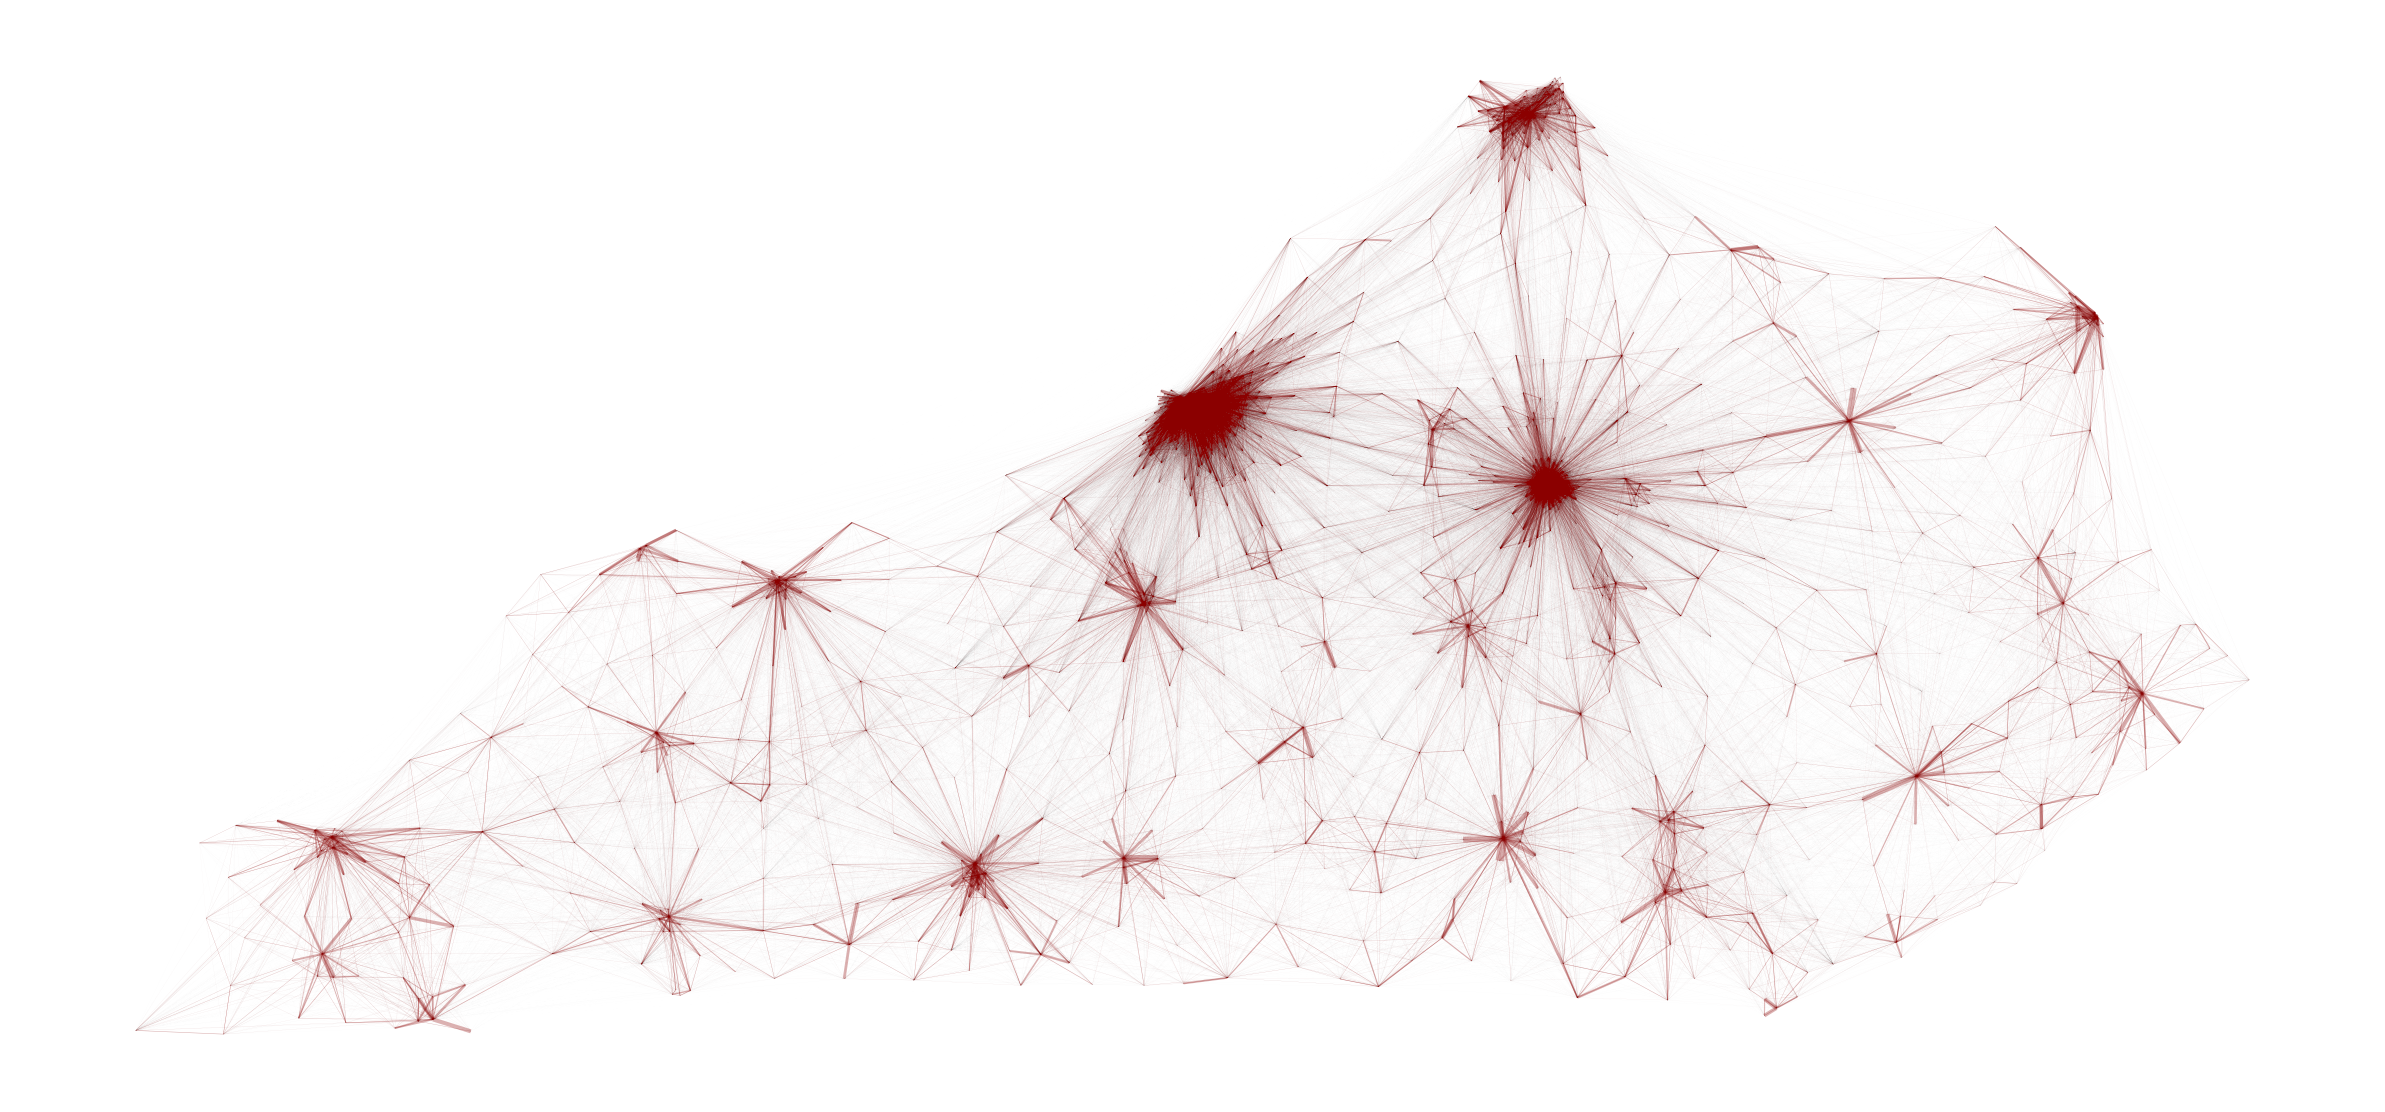

In [53]:
# Plot Static Desire Line Map
fig, ax = plt.subplots(figsize=(10, 14), dpi=300)
ax.set_facecolor("white")  # White background
ax.axis("off")  # Remove axis labels

# Plot Desire Lines
gdf.plot(ax=ax, color="darkred", alpha=0.3, linewidth=gdf["line_width"])

# Save & Show Map
plt.savefig("desire_line_map.png", bbox_inches="tight", dpi=300)
plt.show()

In [56]:
# Save file as a csv
save_file = uk_healthcare_sorted.to_csv('uk_healthcare_desireline.csv', index=False)